# Brianによる神経シミュレーション

順番に Shift + Enter を押していくだけで、シミュレーションが可能です。

参考資料

1.公式チュートリアル　https://brian2.readthedocs.io/en/stable/resources/tutorials/index.html

2.Brianで神経活動シミュレーション https://qiita.com/takeajioka/items/11690b9adee612e48b33

## Brianのインストール


In [3]:
!pip install brian2

これで、GoogleColab上でBrianが使えるようになりました。(制限時間12時間)

次からは、デモを行います。

## デモ　神経細胞集団のラスタープロット

In [2]:
import brian2
brian2.start_scope()

/usr/local/lib/python3.6/dist-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [3]:
# 神経細胞集団の設定
# 100個の細胞にランダムに電位を入力している
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [4]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [5]:
# シミュレーション実行
brian2.run(200*brian2.ms)

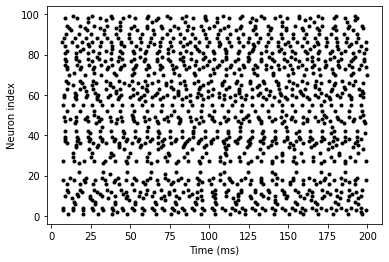

In [6]:
# プロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index');

## デモ　STDPによる可塑性のシミュレーション

In [1]:
import brian2
brian2.start_scope()

/usr/local/lib/python3.6/dist-packages/setuptools/distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


In [2]:
# 神経細胞集団の設定
# 細胞のインデックスが上がるごとに入力電位が上がるように設定した
N = 100
tau = 10 * brian2.ms #膜時定数
v0 = -50 * brian2.mV #静止膜電位
eqs = '''
dv/dt = (v0-v+I)/tau : volt (unless refractory)
I : volt
'''
G = brian2.NeuronGroup(N, eqs, threshold='v>-40*mV', reset='v=-60*mV', refractory=1*brian2.ms, method='exact')
G.v = -70 * brian2.mV
I_max = 40 * brian2.mV
G.I = 'I_max*rand()'

In [3]:
# シナプス結合を定義（STDP）
taupre = taupost = 20*brian2.ms
Apre = 0.1
Apost = -Apre*taupre/taupost*1.05
S = brian2.Synapses(G, G,
             '''
             w : 1
             dapre/dt = -apre/taupre : 1 (event-driven)
             dapost/dt = -apost/taupost : 1 (event-driven)
             ''',
             on_pre='''
             apre += Apre
             w = w+apost
             ''',
             on_post='''
             apost += Apost
             w = w+apre
             ''')
S.connect(condition='i!=j')

In [4]:
# モニタ変数を設定
spikemon = brian2.SpikeMonitor(G)

In [5]:
# シミュレーション実行
brian2.run(5*brian2.second)

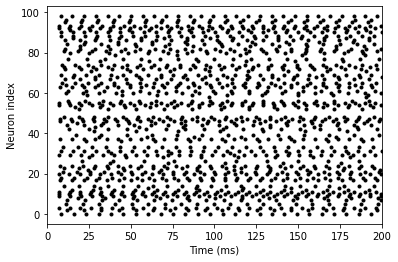

In [6]:
# 初期のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([0, 200]);

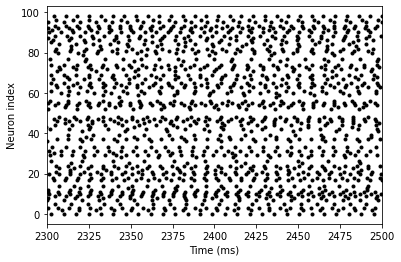

In [7]:
# 中期のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([2500 - 200, 2500]);

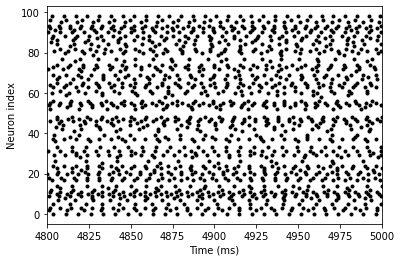

In [8]:
# 最後のプロット
brian2.plot(spikemon.t/brian2.ms, spikemon.i, '.k')
brian2.xlabel('Time (ms)')
brian2.ylabel('Neuron index')
brian2.xlim([5000 - 200, 5000]);